# 1. Reading and Understanding data

In [ ]:
data = pd.read_csv('Data_Negara_HELP.csv')

In [ ]:
display(data)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
print('Ukuran data = {}'.format(data.shape))
print('Index column data = {}'.format(data.columns))

Ukuran data = (167, 10)
Index column data = Index(['Negara', 'Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'],
      dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


* Dari info diatas, data yang digunakan tidak memiliki data kosong

In [ ]:
data.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# 2. Exploratory Data Analysis

Univariate Analysis

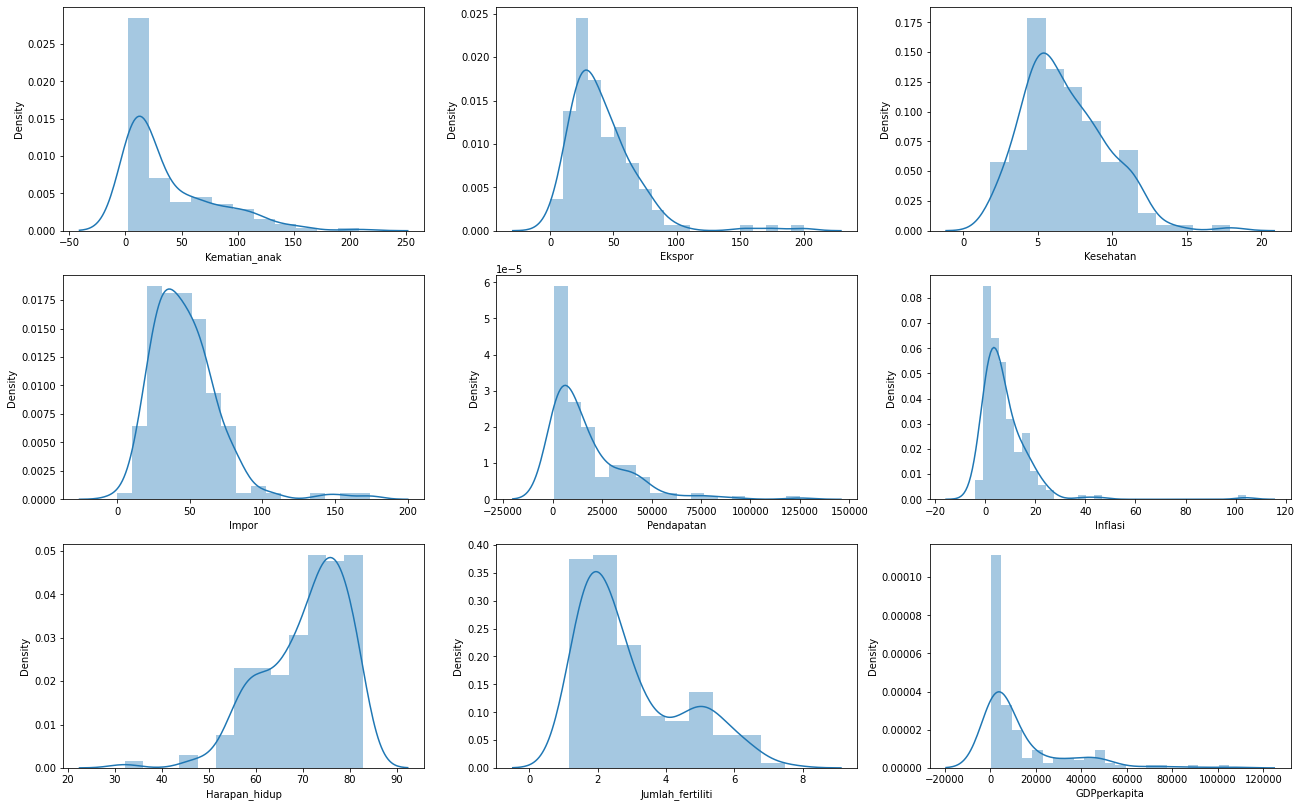

In [ ]:
plt.figure(figsize=(22,14))

for i in enumerate(data.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(data[i[1]])
plt.show()

Bivariate Analysis


Hubungan Variabel "Kematian_anak" dengan lainnya


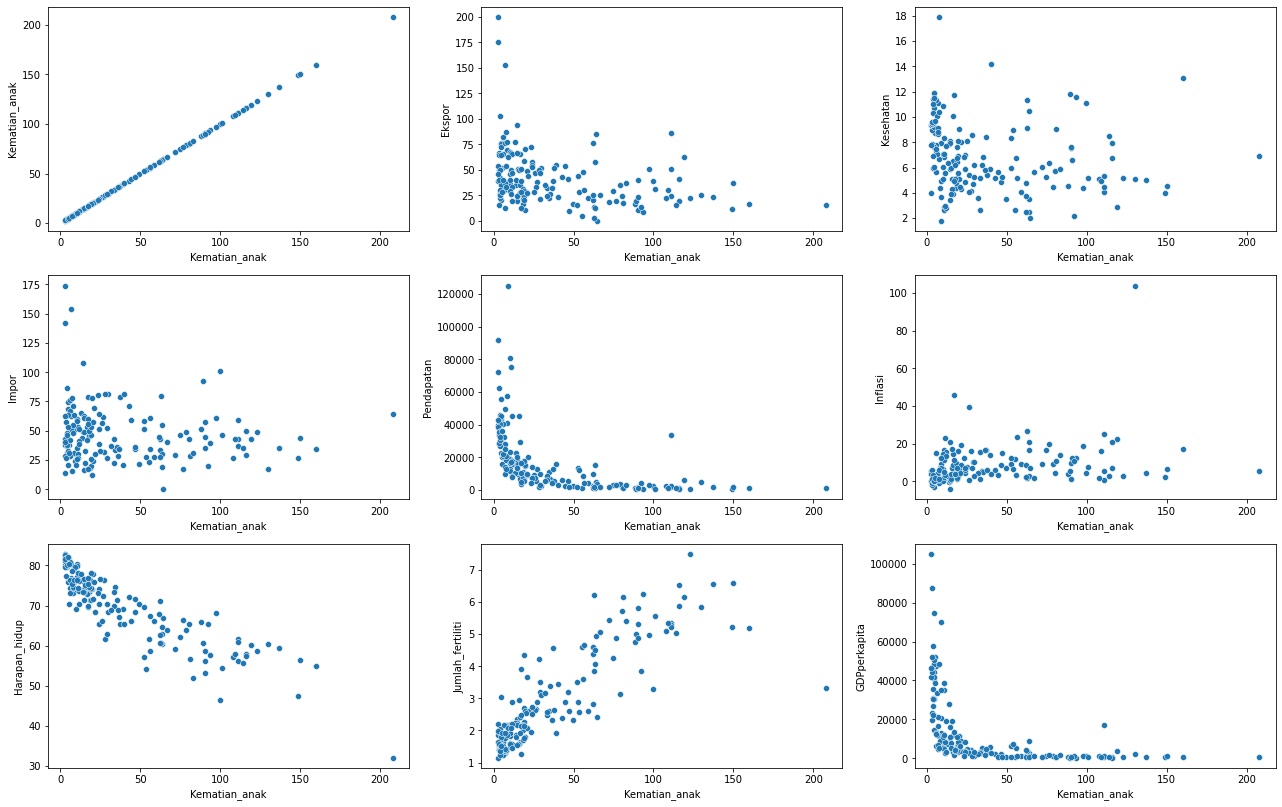





Hubungan Variabel "Ekspor" dengan lainnya


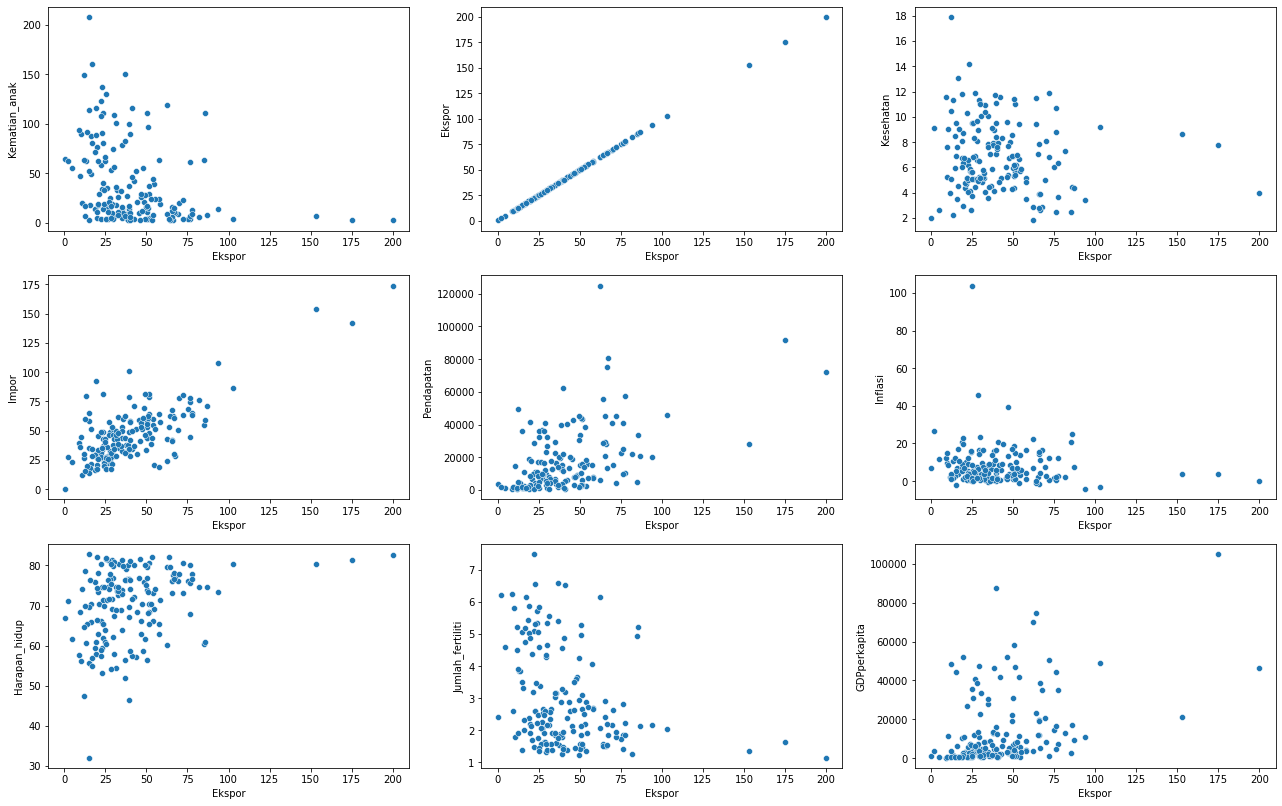





Hubungan Variabel "Kesehatan" dengan lainnya


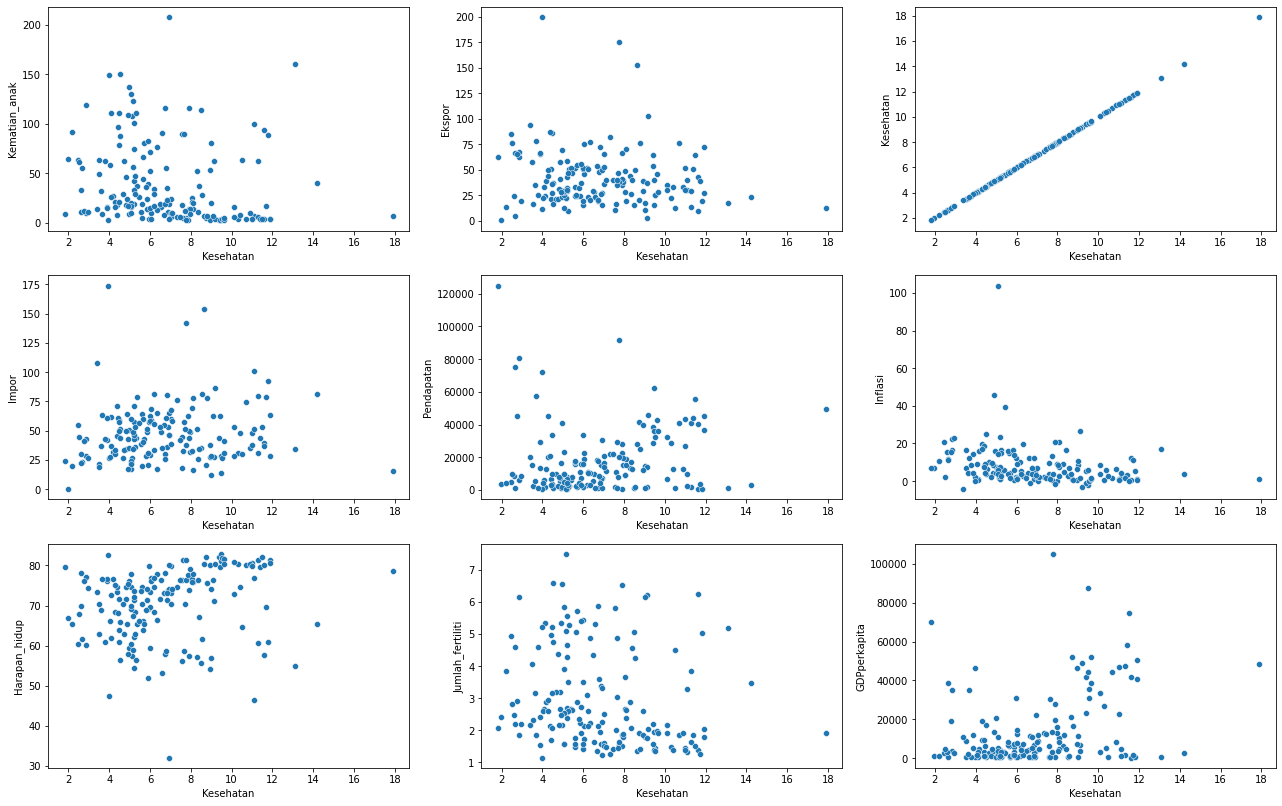





Hubungan Variabel "Impor" dengan lainnya


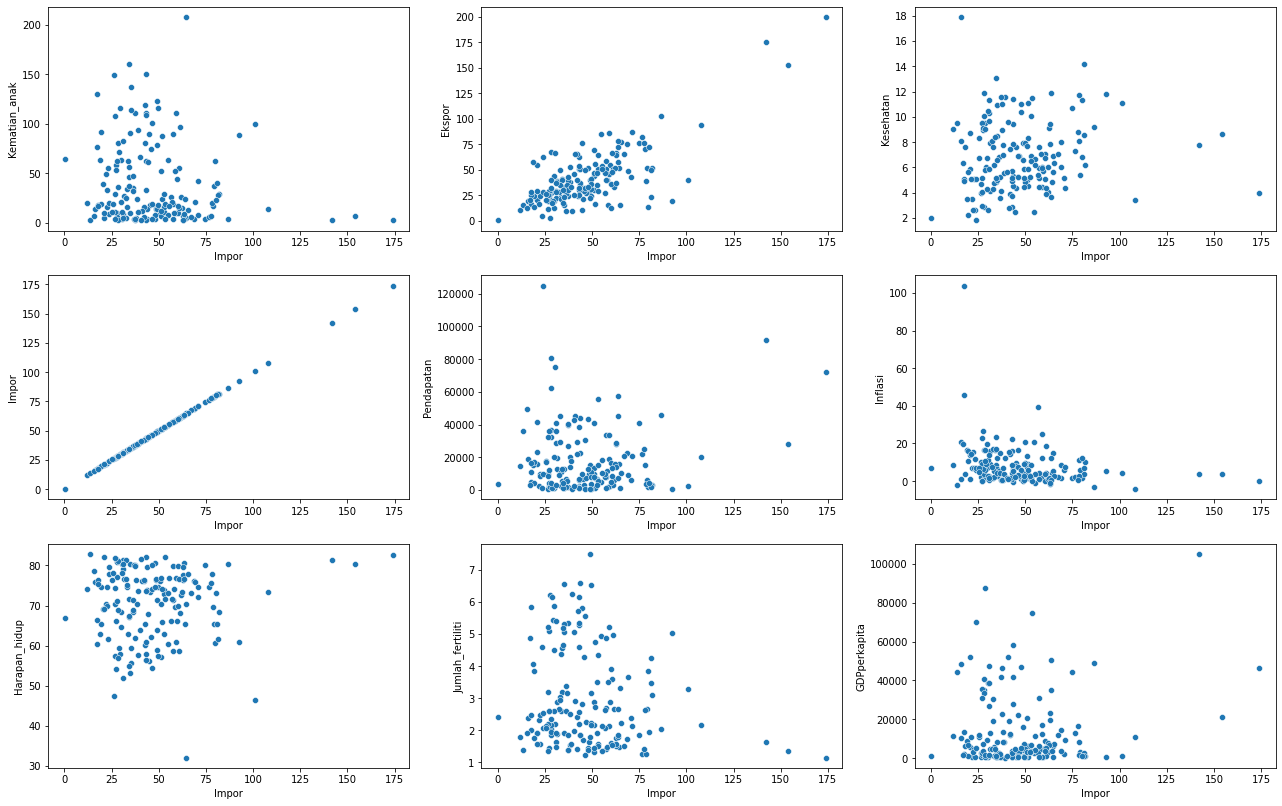





Hubungan Variabel "Pendapatan" dengan lainnya


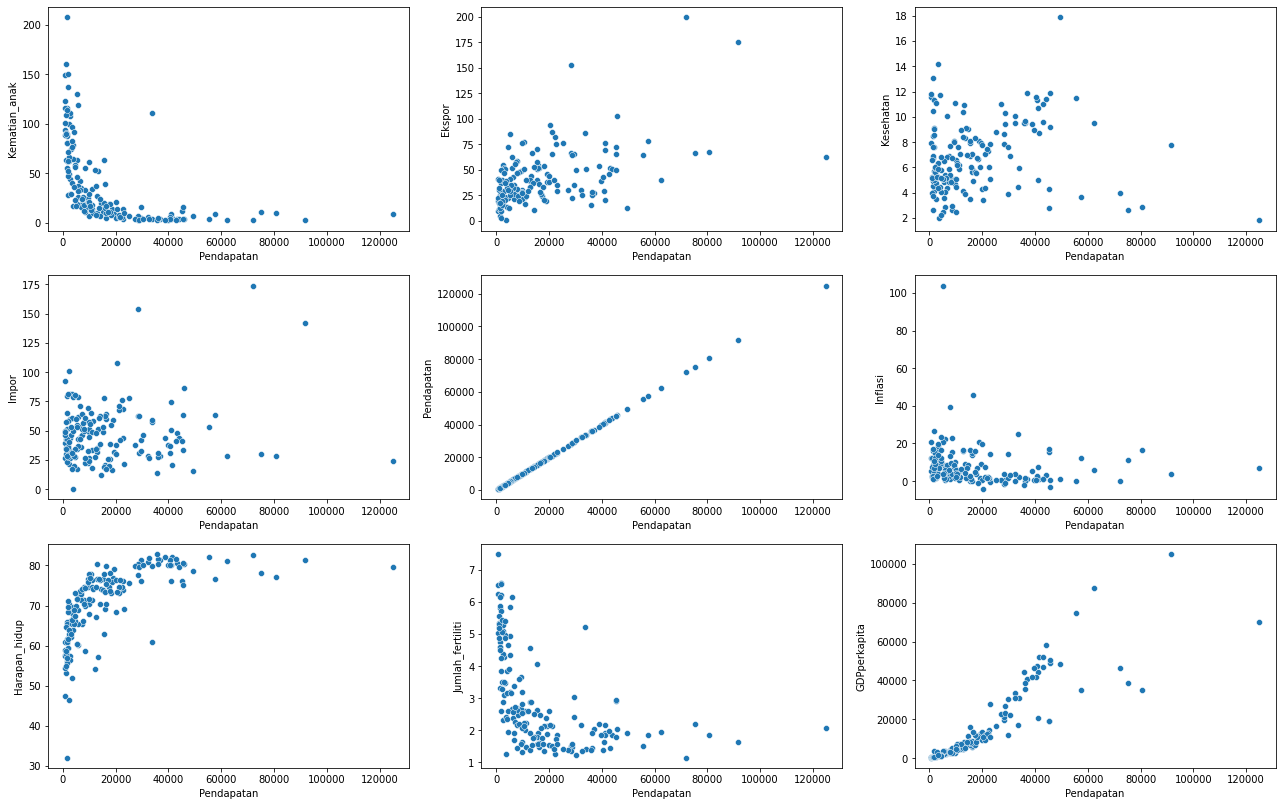





Hubungan Variabel "Inflasi" dengan lainnya


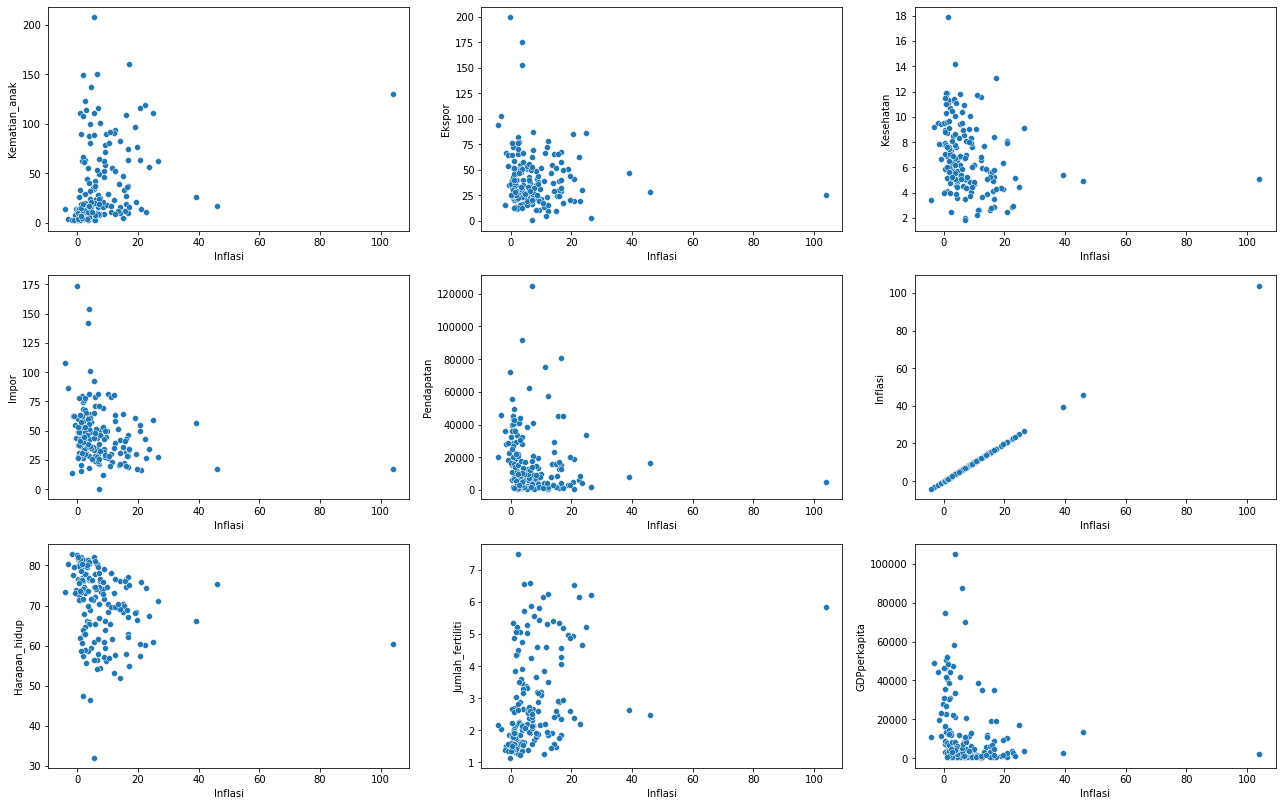





Hubungan Variabel "Harapan_hidup" dengan lainnya


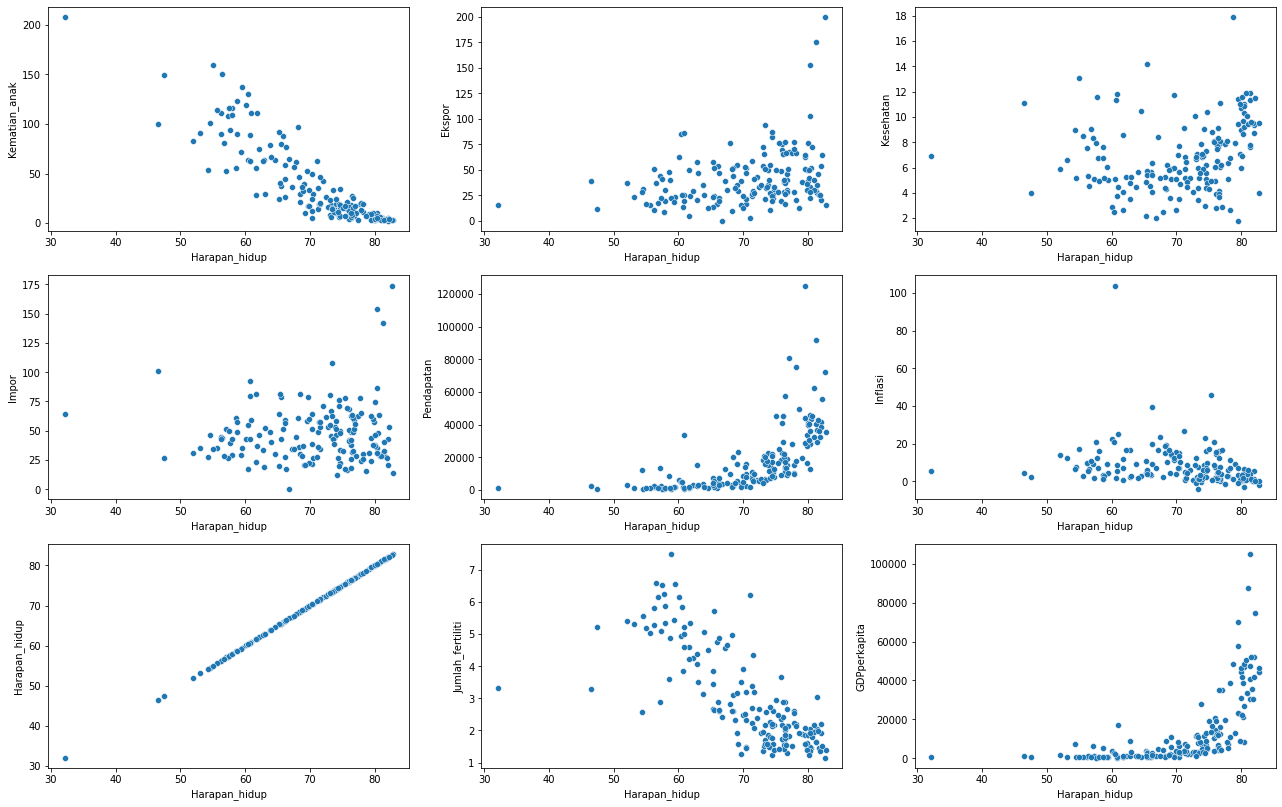





Hubungan Variabel "Jumlah_fertiliti" dengan lainnya


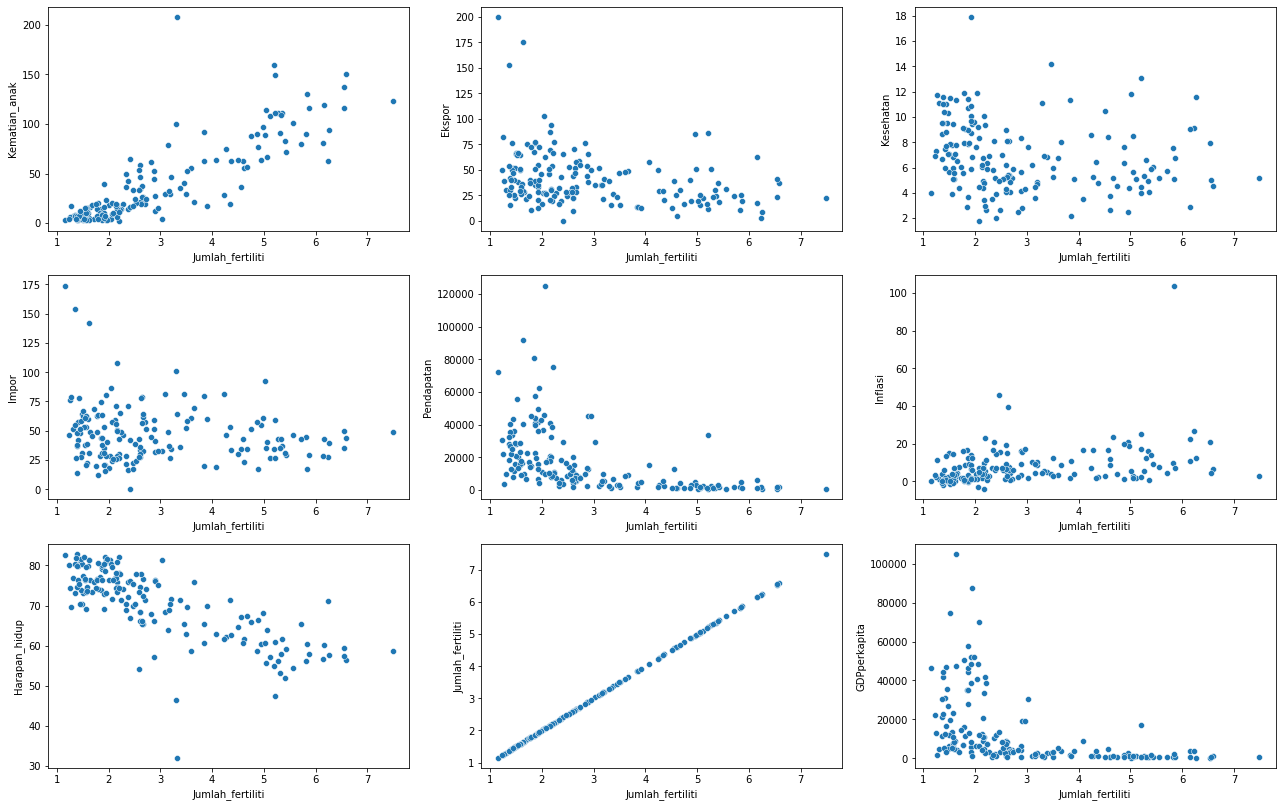





Hubungan Variabel "GDPperkapita" dengan lainnya


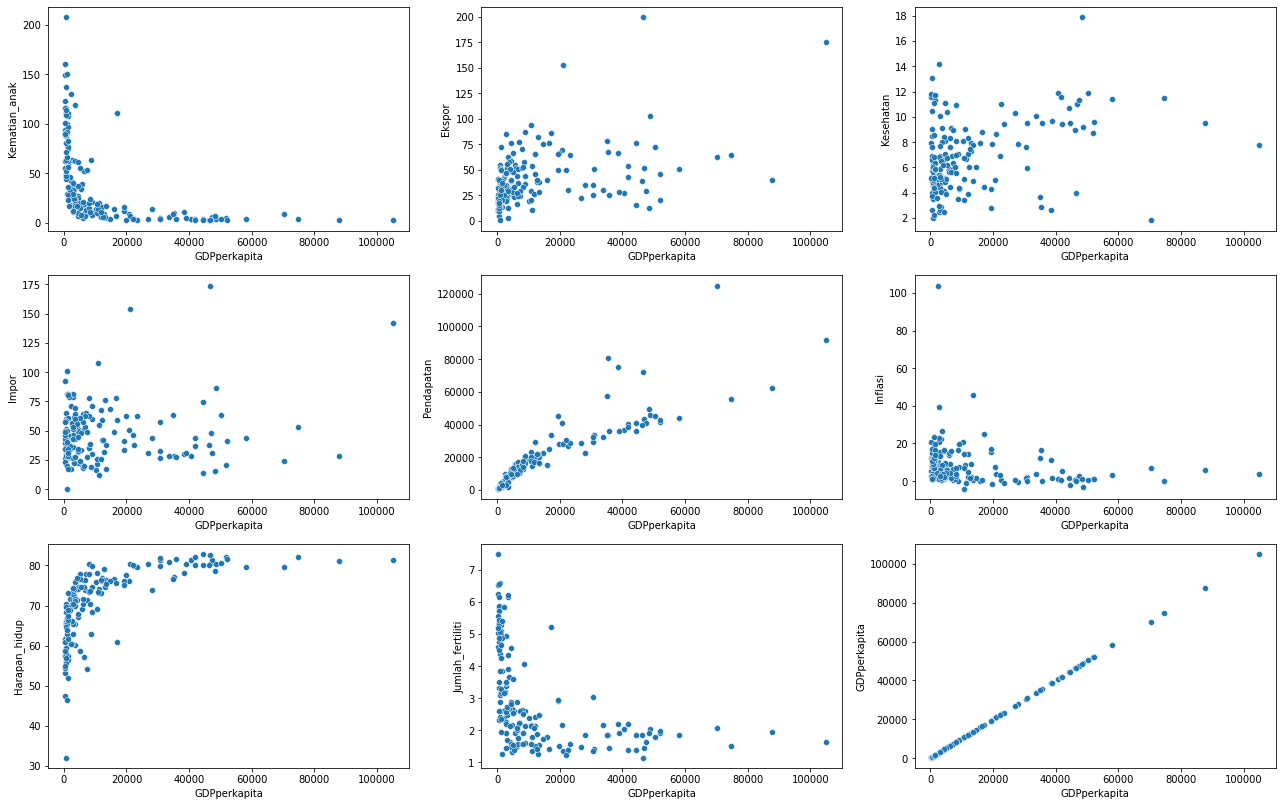

In [ ]:
for R in range(9):
  print('Hubungan Variabel "{}" dengan lainnya'.format(data.describe().columns[R]))
  plt.figure(figsize=(22,14))
  for i,j in enumerate(data.describe().columns):
    plt.subplot(3,3, i+1)
    sns.scatterplot(data = data, x=data.describe().columns[R],y=j)
  plt.show()
  print('\n\n\n')

Multivariate Analysis

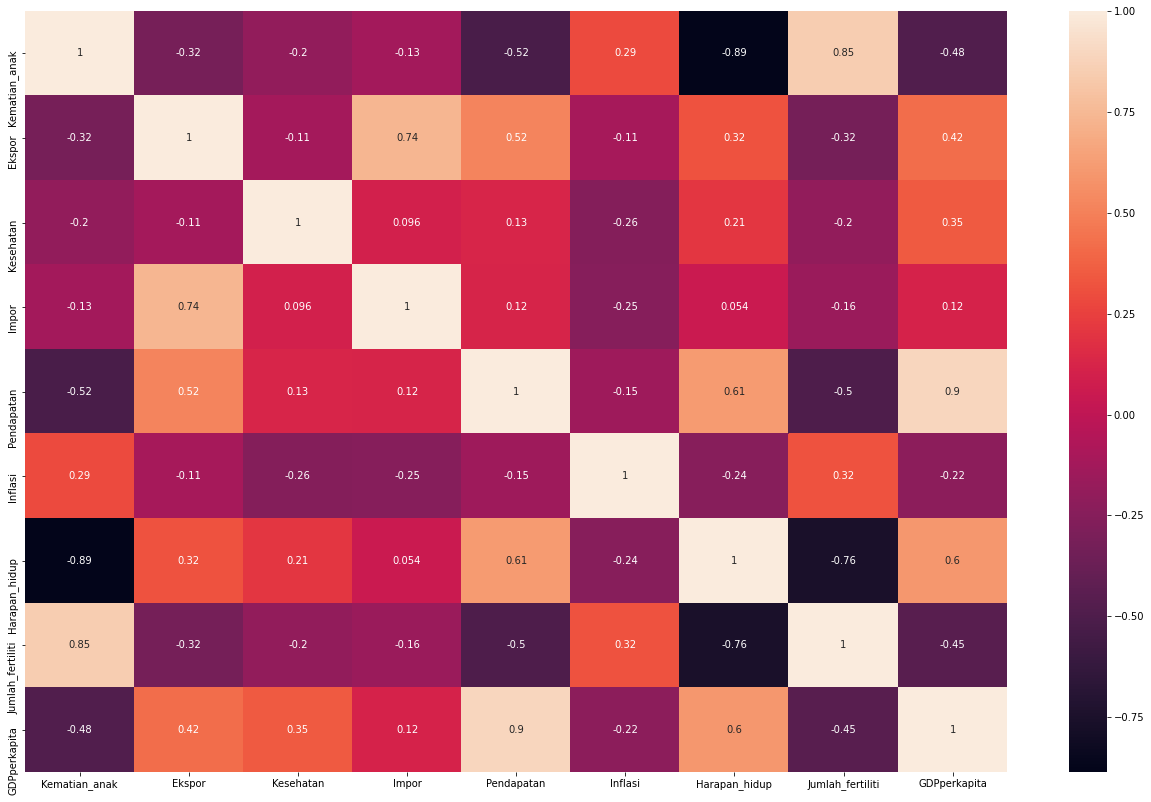

In [ ]:
plt.figure(figsize=(22,14))
sns.heatmap(data.corr(), annot=True, fmt='.2g');

# 3. Outliers Treatment

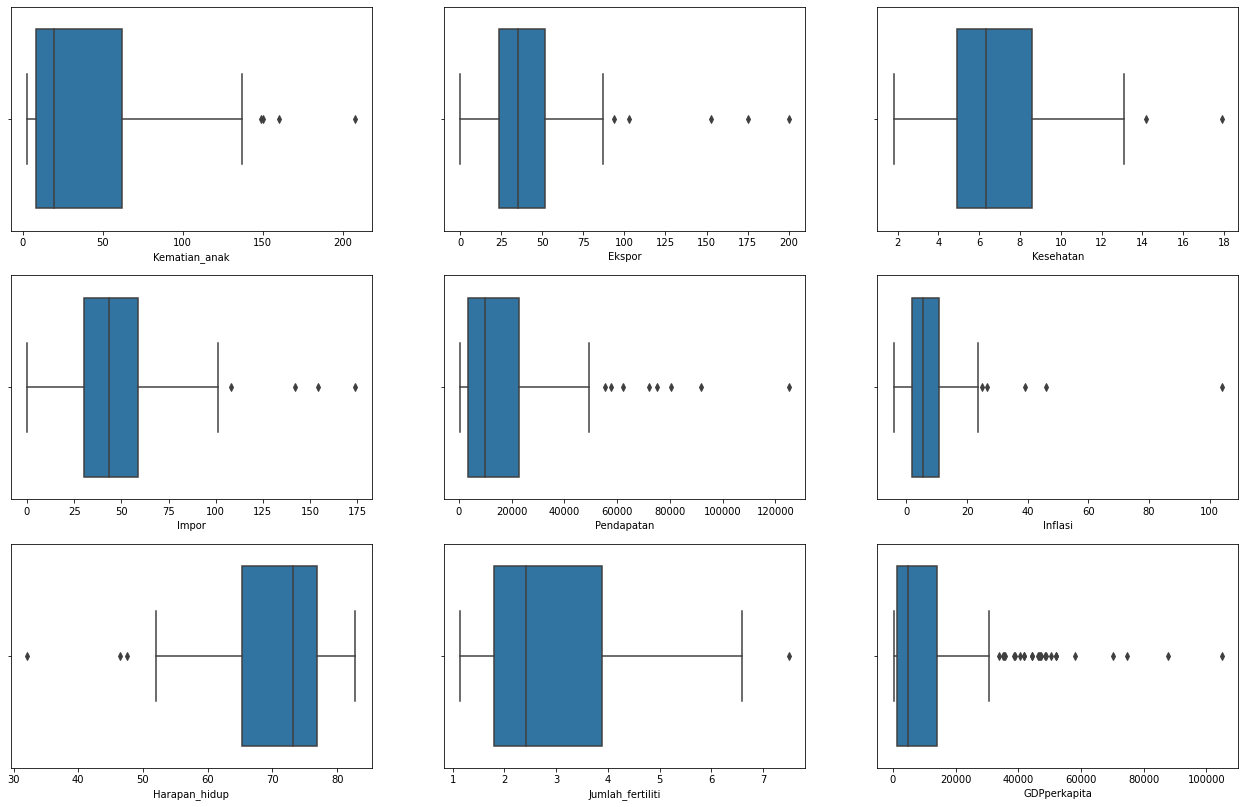

In [ ]:
plt.figure(figsize=(22,14))
for x,y in enumerate(data.describe().columns):
  plt.subplot(3,3, x+1)
  sns.boxplot(y, data = data)
plt.show()

In [ ]:
# fungsi membuang data outlier
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[(df>=(Q1-(1.5*IQR))) & (df<=(Q3+(1.5*IQR)))]
  return df_final

In [ ]:
index_kolom = data.columns
index_kolom

Index(['Negara', 'Kematian_anak', 'Ekspor', 'Kesehatan', 'Impor', 'Pendapatan',
       'Inflasi', 'Harapan_hidup', 'Jumlah_fertiliti', 'GDPperkapita'],
      dtype='object')

In [ ]:
data1 = data.copy()

In [ ]:
data_no_outlier = []

In [ ]:
for i,j in enumerate(index_kolom[1:]):
  k = remove_outlier(data1[j])
  data_no_outlier.append(k)

In [ ]:
data_no_outlier = pd.DataFrame(data_no_outlier).T

In [ ]:
data_no_outlier.insert(0, index_kolom[0], data[index_kolom[0]])

In [ ]:
data_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     163 non-null    float64
 2   Ekspor            162 non-null    float64
 3   Kesehatan         165 non-null    float64
 4   Impor             163 non-null    float64
 5   Pendapatan        159 non-null    float64
 6   Inflasi           162 non-null    float64
 7   Harapan_hidup     164 non-null    float64
 8   Jumlah_fertiliti  166 non-null    float64
 9   GDPperkapita      142 non-null    float64
dtypes: float64(9), object(1)
memory usage: 14.4+ KB


In [ ]:
# Hilangkan baris yang memiliki data kosong
data_siap = data_no_outlier.dropna()
data_siap = data_siap.reset_index(drop=True)

In [ ]:
data_siap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            128 non-null    object 
 1   Kematian_anak     128 non-null    float64
 2   Ekspor            128 non-null    float64
 3   Kesehatan         128 non-null    float64
 4   Impor             128 non-null    float64
 5   Pendapatan        128 non-null    float64
 6   Inflasi           128 non-null    float64
 7   Harapan_hidup     128 non-null    float64
 8   Jumlah_fertiliti  128 non-null    float64
 9   GDPperkapita      128 non-null    float64
dtypes: float64(9), object(1)
memory usage: 10.1+ KB


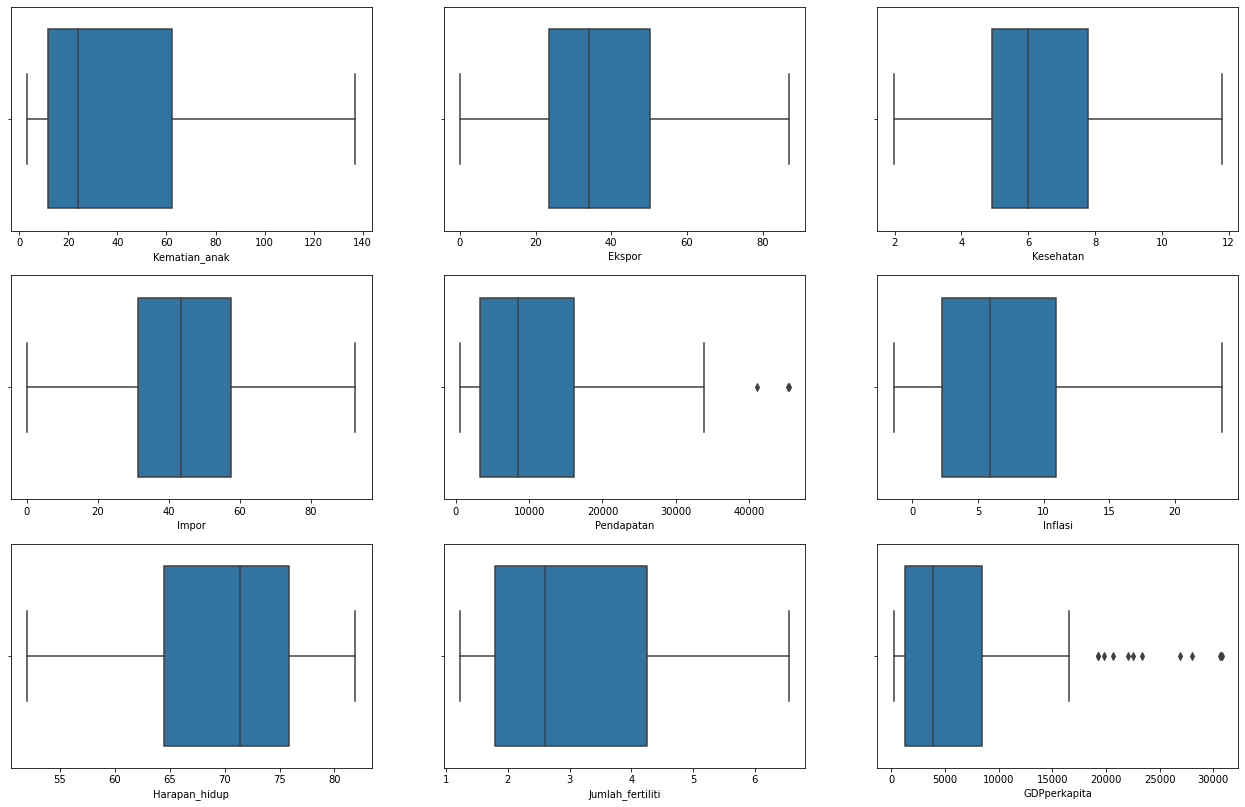

In [ ]:
plt.figure(figsize=(22,14))
for x,y in enumerate(data_siap.describe().columns):
  plt.subplot(3,3, x+1)
  sns.boxplot(y, data = data_siap)
plt.show()

# 4. Scaling Data


In [ ]:
data_analisis =  data_siap[['Negara','Pendapatan','GDPperkapita']]
data_analisis

,Negara,Pendapatan,GDPperkapita
0,Afghanistan,1610.0,553.0
1,Albania,9930.0,4090.0
2,Algeria,12900.0,4460.0
3,Angola,5900.0,3530.0
4,Antigua and Barbuda,19100.0,12200.0
...,...,...,...
123,Uzbekistan,4240.0,1380.0
124,Vanuatu,2950.0,2970.0
125,Vietnam,4490.0,1310.0
126,Yemen,4480.0,1310.0


In [ ]:
from sklearn.preprocessing import StandardScaler

data_scaling = data_siap[['Pendapatan','GDPperkapita']]

sc = StandardScaler()
data_std = sc.fit_transform(data_scaling)
display(data_std)

array([[-0.97979661, -0.82556137],
       [-0.12528564, -0.32838491],
       [ 0.17975012, -0.27637607],
       [-0.53918939, -0.407101  ],
       [ 0.81652513,  0.81159278],
       [ 0.77544287,  0.54452032],
       [-0.45702488, -0.45067598],
       [ 0.49813763, -0.08239712],
       [ 1.20680658,  3.0325111 ],
       [ 3.07604932,  2.00639061],
       [-0.89455093, -0.79674566],
       [ 0.42624367,  1.34573769],
       [ 0.51867875, -0.05568988],
       [-0.33583221, -0.2932438 ],
       [-0.95822843, -0.79674566],
       [-0.48578246, -0.59686301],
       [-0.58951516, -0.6249759 ],
       [-0.14685383, -0.2552914 ],
       [ 0.22083238, -0.01070925],
       [ 0.34407916,  0.67102833],
       [ 0.42624367,  0.05816733],
       [-0.99828363, -0.82246895],
       [-1.06668559, -0.87082313],
       [-0.88633447, -0.79280986],
       [-0.87195568, -0.71915408],
       [-0.54637879, -0.43802518],
       [ 0.84733682,  0.9099879 ],
       [-0.1663679 , -0.26231962],
       [-0.02566117,

# 5. Creating k means clustering and visualizing clusters formed


In [ ]:
display(data_analisis)

,Negara,Pendapatan,GDPperkapita
0,Afghanistan,1610.0,553.0
1,Albania,9930.0,4090.0
2,Algeria,12900.0,4460.0
3,Angola,5900.0,3530.0
4,Antigua and Barbuda,19100.0,12200.0
...,...,...,...
123,Uzbekistan,4240.0,1380.0
124,Vanuatu,2950.0,2970.0
125,Vietnam,4490.0,1310.0
126,Yemen,4480.0,1310.0


In [ ]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(data_std)
labels1 = kmeans1.labels_
display(labels1)
display(kmeans1)

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
data_analisis['label1_kmeans'] = labels1

In [ ]:
data_analisis

,Negara,Pendapatan,GDPperkapita,label1_kmeans
0,Afghanistan,1610.0,553.0,0
1,Albania,9930.0,4090.0,0
2,Algeria,12900.0,4460.0,0
3,Angola,5900.0,3530.0,0
4,Antigua and Barbuda,19100.0,12200.0,1
...,...,...,...,...
123,Uzbekistan,4240.0,1380.0,0
124,Vanuatu,2950.0,2970.0,0
125,Vietnam,4490.0,1310.0,0
126,Yemen,4480.0,1310.0,0


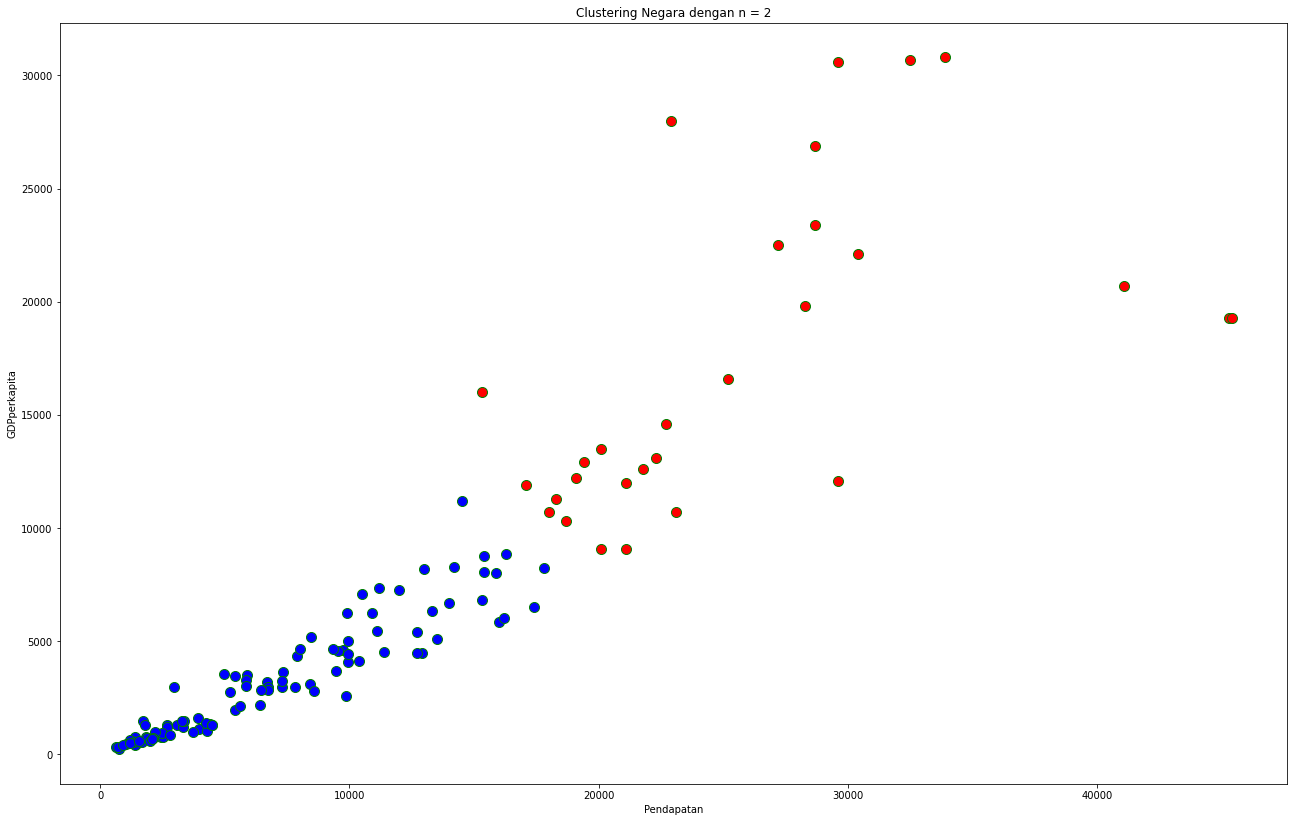

In [ ]:
plt.figure(figsize=(22,14))


plt.scatter(data_analisis['Pendapatan'][data_analisis.label1_kmeans == 0], data_analisis['GDPperkapita'][data_analisis.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(data_analisis['Pendapatan'][data_analisis.label1_kmeans == 1], data_analisis['GDPperkapita'][data_analisis.label1_kmeans == 1], c='red', s=100, edgecolor='green')
plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.title('Clustering Negara dengan n = 2')

plt.show()

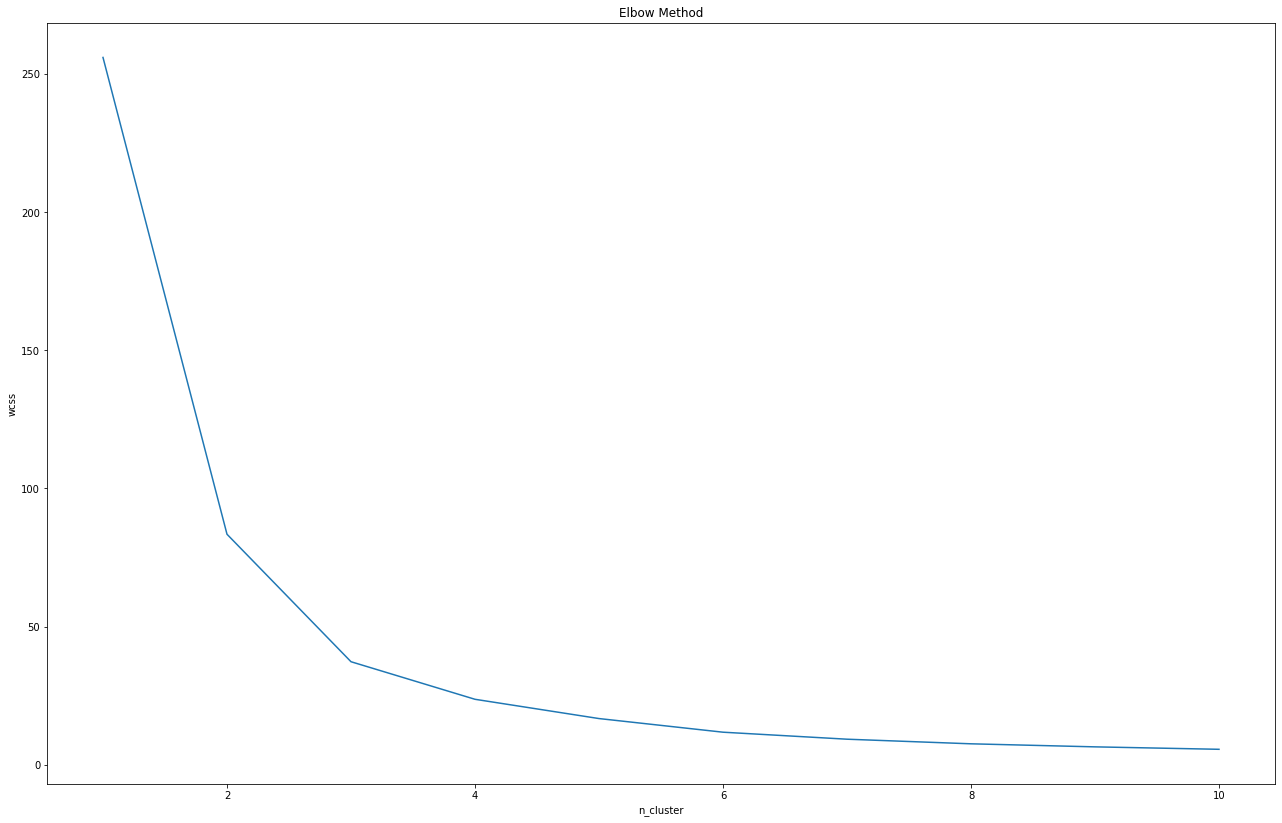

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(data_std)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(22,14))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('n_cluster')
plt.ylabel('wcss')

plt.show()

ambil n = 3

In [ ]:
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters = 3, random_state=42).fit(data_std)
labels2 = kmeans2.labels_
display(labels2)
display(kmeans2)

array([2, 2, 0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2], dtype=int32)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
data_analisis['label2_kmeans'] = labels2

In [ ]:
data_analisis

,Negara,Pendapatan,GDPperkapita,label1_kmeans,label2_kmeans
0,Afghanistan,1610.0,553.0,0,2
1,Albania,9930.0,4090.0,0,2
2,Algeria,12900.0,4460.0,0,0
3,Angola,5900.0,3530.0,0,2
4,Antigua and Barbuda,19100.0,12200.0,1,0
...,...,...,...,...,...
123,Uzbekistan,4240.0,1380.0,0,2
124,Vanuatu,2950.0,2970.0,0,2
125,Vietnam,4490.0,1310.0,0,2
126,Yemen,4480.0,1310.0,0,2


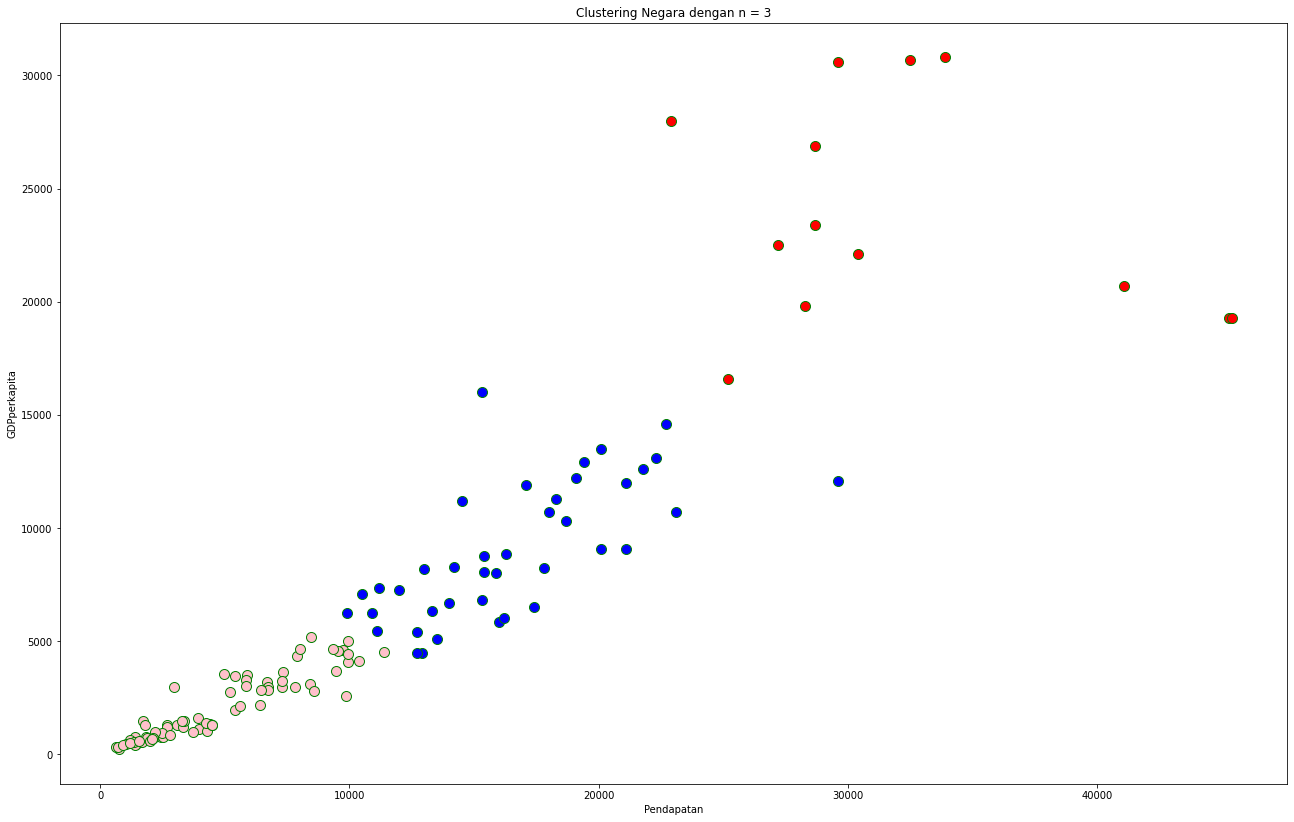

In [ ]:
plt.figure(figsize=(22,14))


plt.scatter(data_analisis['Pendapatan'][data_analisis.label2_kmeans == 0], data_analisis['GDPperkapita'][data_analisis.label2_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(data_analisis['Pendapatan'][data_analisis.label2_kmeans == 1], data_analisis['GDPperkapita'][data_analisis.label2_kmeans == 1], c='red', s=100, edgecolor='green')
plt.scatter(data_analisis['Pendapatan'][data_analisis.label2_kmeans == 2], data_analisis['GDPperkapita'][data_analisis.label2_kmeans == 2], c='pink', s=100, edgecolor='green')

plt.xlabel('Pendapatan')
plt.ylabel('GDPperkapita')
plt.title('Clustering Negara dengan n = 3')

plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(data_std, labels=labels1))
print(silhouette_score(data_std, labels=labels2))

0.6482885150246772
0.6019192388853021


karena nilai silhouette n = 2 lebih besar dbandingkan dengan n = 3 maka clustering yang diambil adalah n = 2

# 6. Report countries

In [ ]:
data_siap['label1_kmeans'] = data_analisis['label1_kmeans']
data_siap

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1
...,...,...,...,...,...,...,...,...,...,...,...
123,Uzbekistan,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380.0,0
124,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,0
125,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,0
126,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,0


In [ ]:
data_negara_bantuan = data_siap[data_siap['label1_kmeans']==0].reset_index(drop=True)
data_negara_bantuan = data_negara_bantuan.drop(columns=['label1_kmeans'])
data_negara_bantuan

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Armenia,18.1,20.8,4.40,45.3,6700.0,7.77,73.3,1.69,3220.0
...,...,...,...,...,...,...,...,...,...,...
94,Uzbekistan,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380.0
95,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
96,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
97,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0


In [ ]:
data_negara_bantuan.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,47.572727,34.185848,6.158586,44.997635,6870.515152,7.942667,67.710101,3.357980,3230.424242
std,33.826194,17.328256,2.251238,17.960666,4892.796803,5.875379,7.118093,1.482324,2587.813012
min,5.500000,0.109000,1.970000,0.065900,609.000000,0.238000,52.000000,1.270000,231.000000
25%,18.850000,22.400000,4.825000,31.900000,2460.000000,3.325000,61.750000,2.185000,977.500000
50%,36.300000,31.300000,5.810000,44.500000,5840.000000,6.810000,69.000000,2.880000,2830.000000
75%,69.350000,47.450000,7.335000,57.400000,10180.000000,11.350000,73.800000,4.640000,4670.000000
max,137.000000,85.100000,11.800000,92.600000,17800.000000,23.600000,80.400000,6.550000,11200.000000


In [ ]:
print('Berikut negara - negara yang membutuhkan bantuan : \n')
for i,j in enumerate(data_negara_bantuan['Negara']):
  if i%10 == 8:
    print(j)
  else:
    print(j,end = ',  ')

Berikut negara - negara yang membutuhkan bantuan : 

Afghanistan,  Albania,  Algeria,  Angola,  Armenia,  Azerbaijan,  Bangladesh,  Belarus,  Belize
Benin,  Bhutan,  Bolivia,  Bosnia and Herzegovina,  Botswana,  Brazil,  Bulgaria,  Burkina Faso,  Burundi,  Cambodia
Cameroon,  Cape Verde,  China,  Colombia,  Comoros,  Congo, Dem. Rep.,  Congo, Rep.,  Costa Rica,  Cote d'Ivoire,  Dominican Republic
Ecuador,  Egypt,  El Salvador,  Eritrea,  Fiji,  Gabon,  Gambia,  Georgia,  Ghana,  Grenada
Guatemala,  Guinea,  Guinea-Bissau,  Guyana,  India,  Indonesia,  Iran,  Iraq,  Jamaica,  Jordan
Kenya,  Kiribati,  Kyrgyz Republic,  Lao,  Lebanon,  Liberia,  Macedonia, FYR,  Madagascar,  Malawi,  Maldives
Mali,  Mauritania,  Mauritius,  Moldova,  Montenegro,  Morocco,  Mozambique,  Myanmar,  Namibia,  Nepal
Pakistan,  Panama,  Paraguay,  Peru,  Philippines,  Romania,  Rwanda,  Samoa,  Senegal,  Serbia
Solomon Islands,  South Africa,  Sri Lanka,  St. Vincent and the Grenadines,  Sudan,  Suriname,  Taj